In [26]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [29]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [30]:

print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 175s 93ms/step - loss: 0.4422 - accuracy: 0.9544 - val_loss: 0.0851 - val_accuracy: 0.9729
Epoch 2/3
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0635 - accuracy: 0.9811 - val_loss: 0.0741 - val_accuracy: 0.9771
Epoch 3/3
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0851 - val_accuracy: 0.9794


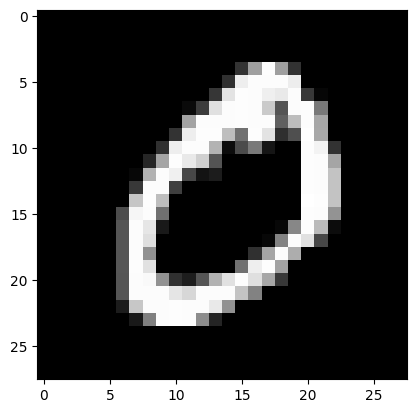

1/1 [==============================] - 0s 309ms/step


Prediction: 0


In [35]:
example = X_train[1]
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
prediction = model.predict(example.reshape(1,28,28,1))
print("\n\nPrediction: {}".format(np.argmax(prediction)))

Preprocessing rest image:




----------------Contoured Image--------------------


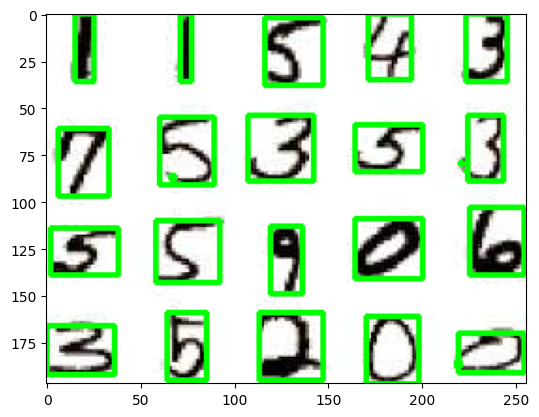

In [38]:
image = cv2.imread('/content/download2.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    digit = thresh[y:y+h, x:x+w]#cropping digit
    resized_digit = cv2.resize(digit, (18,18))
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    preprocessed_digits.append(padded_digit)

print("Contoured Image:")
plt.imshow(image, cmap="gray")
plt.show()

inp = np.array(preprocessed_digits)

1/1 [==============================] - 0s 36ms/step


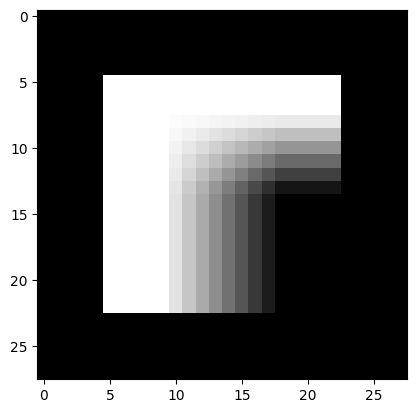

Prediction: 8
1/1 [==============================] - 0s 77ms/step


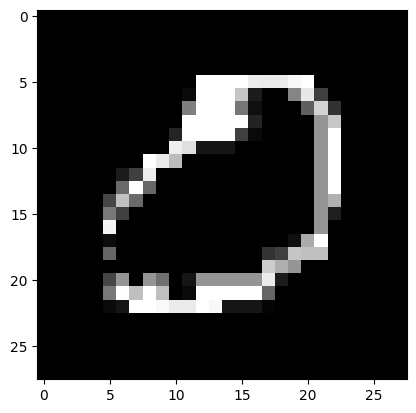

Prediction: 2
1/1 [==============================] - 0s 76ms/step


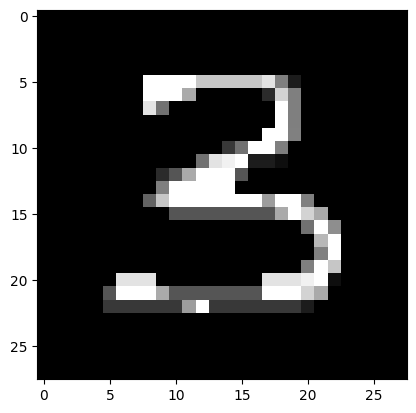

Prediction: 3
1/1 [==============================] - 0s 81ms/step


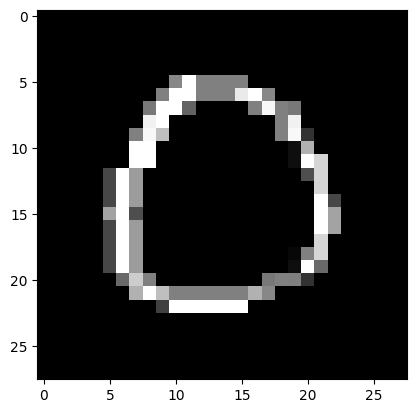

Prediction: 0
1/1 [==============================] - 0s 38ms/step


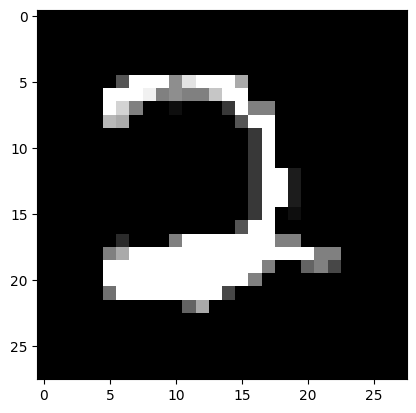

Prediction: 2
1/1 [==============================] - 0s 26ms/step


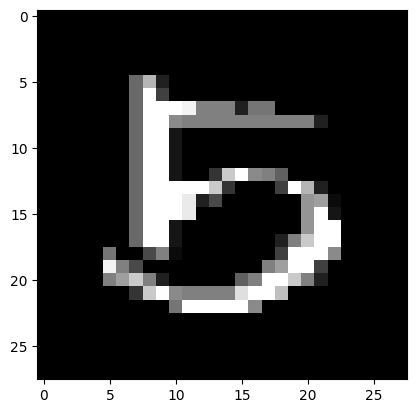

Prediction: 5
1/1 [==============================] - 0s 29ms/step


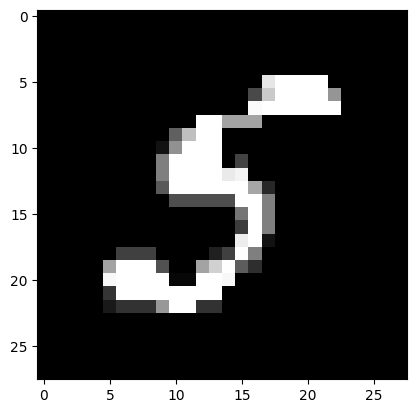

Prediction: 5
1/1 [==============================] - 0s 25ms/step


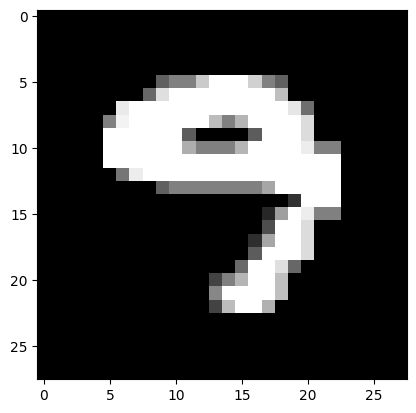

Prediction: 9
1/1 [==============================] - 0s 25ms/step


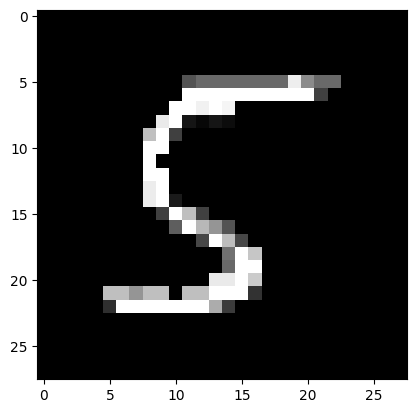

Prediction: 5
1/1 [==============================] - 0s 25ms/step


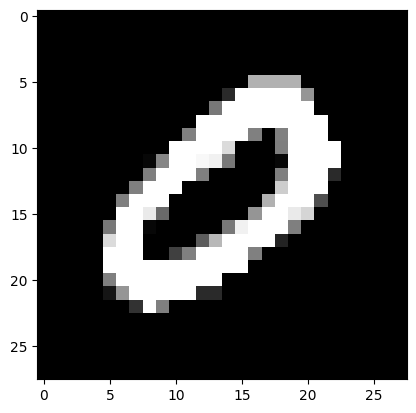

Prediction: 0
1/1 [==============================] - 0s 24ms/step


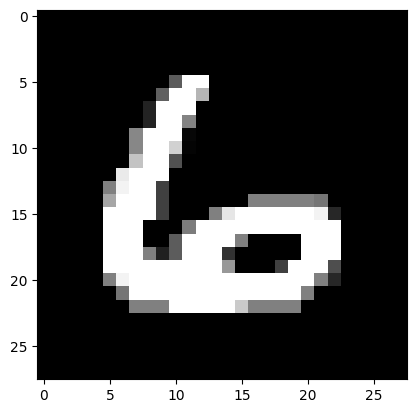

Prediction: 6
1/1 [==============================] - 0s 24ms/step


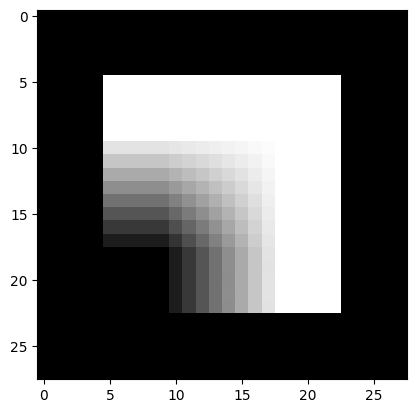

Prediction: 4
1/1 [==============================] - 0s 24ms/step


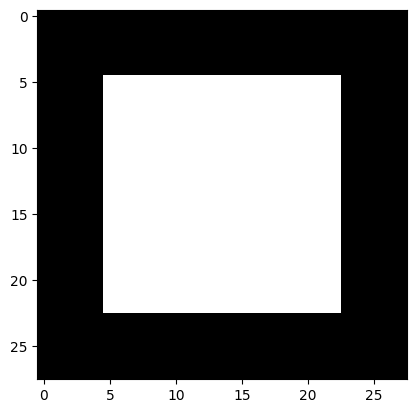

Prediction: 0
1/1 [==============================] - 0s 31ms/step


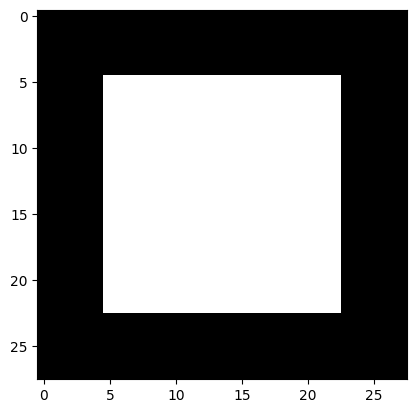

Prediction: 0
1/1 [==============================] - 0s 24ms/step


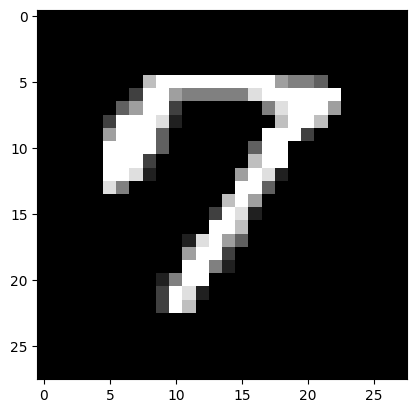

Prediction: 2
1/1 [==============================] - 0s 27ms/step


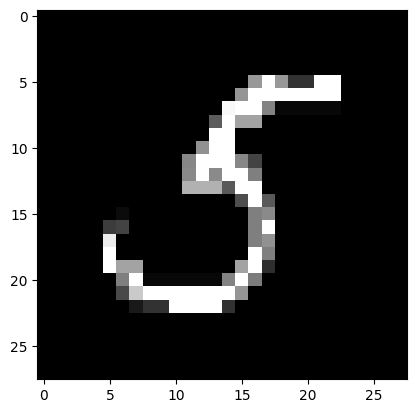

Prediction: 5
1/1 [==============================] - 0s 102ms/step


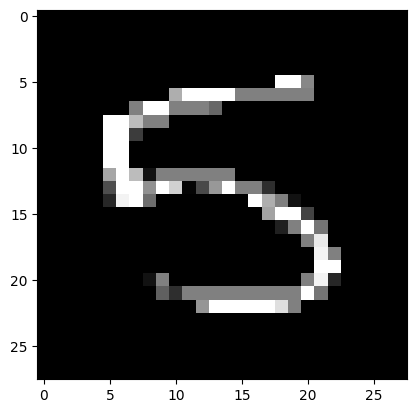

Prediction: 5
1/1 [==============================] - 0s 49ms/step


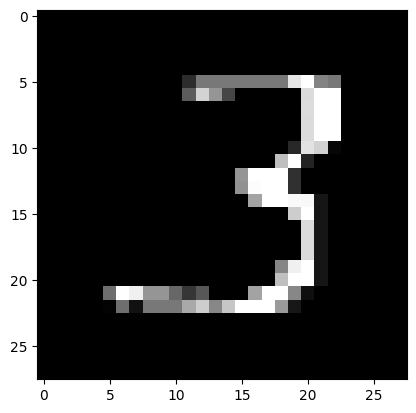

Prediction: 3
1/1 [==============================] - 0s 53ms/step


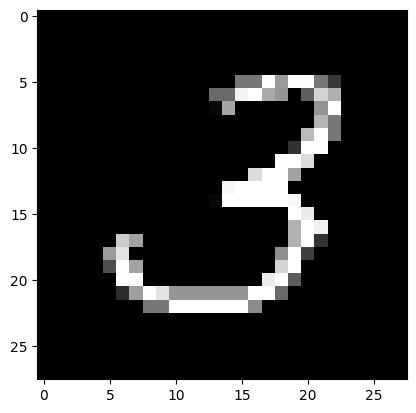

Prediction: 5
1/1 [==============================] - 0s 46ms/step


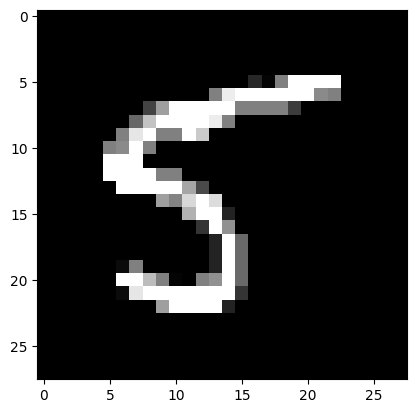

Prediction: 5
1/1 [==============================] - 0s 51ms/step


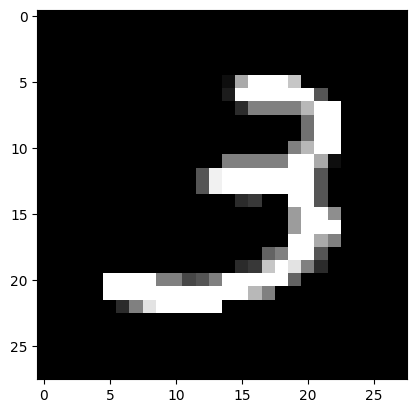

Prediction: 3
1/1 [==============================] - 0s 61ms/step


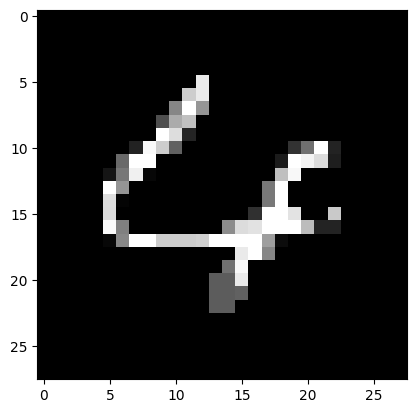

Prediction: 4
1/1 [==============================] - 0s 45ms/step


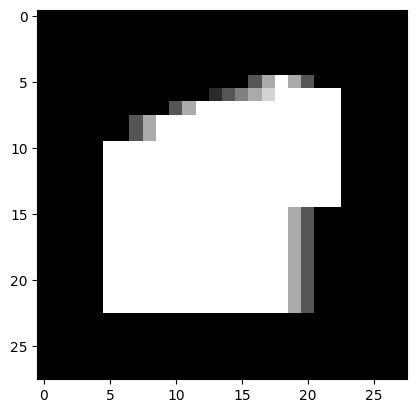

Prediction: 0
1/1 [==============================] - 0s 47ms/step


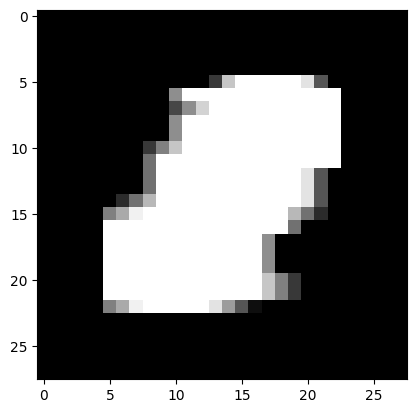

Prediction: 2


In [40]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))

    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("Prediction: {}".format(np.argmax(prediction)))